In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

path = "Resources/COVID_final_data.csv"

data = pd.read_csv(path)
data_lat = data[data.Latitude !='Not Available'].reset_index(drop=True)
data_lat

,Unnamed: 0,Country,Country Code,Cases,Deaths,Deaths per 1000 Cases,Population 2019,"Cases per 100,000 People","Deaths per 100,000 People",2017 GDP in Billions,2018 GDP in Billions,2019 GDP in Billions,Capital,Latitude
0,0,Afghanistan,AFG,39616,1470,37.11,38041757.0,104.14,3.86,20.191760,19.484385,19.101354,Kabul,34.5167
1,1,Albania,ALB,14730,407,27.63,2862427.0,514.60,14.22,13.019693,15.147021,15.278077,Tirana,41.3275
2,2,Algeria,DZA,52520,1779,33.87,43053054.0,121.99,4.13,167.389000,173.758000,169.988000,Algiers,36.7631
3,3,Andorra,AND,2568,53,20.64,76177.0,3371.10,69.57,3.000181,3.218316,3.154058,Andorra la Vella,42.5
4,4,Angola,AGO,5725,211,36.86,31825299.0,17.99,0.66,122.124000,101.353000,94.635416,Luanda,-8.8383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,194,"Venezuela, RB",VEN,80404,671,8.35,28515829.0,281.96,2.35,0.000000,0.000000,0.000000,Caracas,10.501
181,195,Vietnam,VNM,1099,35,31.85,96462108.0,1.14,0.04,223.780000,245.214000,261.921000,Hanoi,21.0333
182,196,"Yemen, Rep.",YEM,2053,594,289.33,29161922.0,7.04,2.04,24.561328,27.591262,0.000000,Sanaa,15.3547
183,197,Zambia,ZMB,15224,334,21.94,17861034.0,85.24,1.87,25.868142,27.005239,23.064722,Lusaka,-15.4166


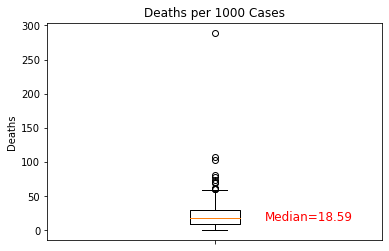

In [23]:
plt.boxplot(data['Deaths per 1000 Cases'])
plt.title('Deaths per 1000 Cases')
plt.ylabel('Deaths')
plt.annotate(f"Median={data['Deaths per 1000 Cases'].median()}",(1.15,15),fontsize=12,color="red")
plt.tick_params(labelbottom=False)
plt.show()

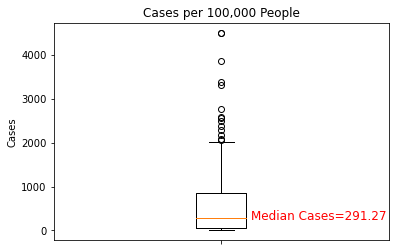

In [24]:
plt.boxplot(data['Cases per 100,000 People'])
plt.title('Cases per 100,000 People')
plt.ylabel('Cases')
plt.annotate(f"Median Cases={data['Cases per 100,000 People'].median()}",(1.09,250),fontsize=12,color="red")
plt.tick_params(labelbottom=False)
plt.savefig("Resources/casesper100k_box.png")
plt.show()

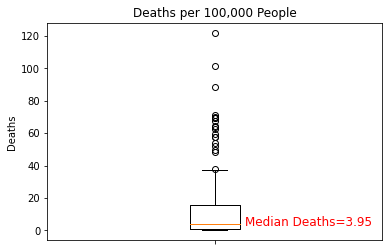

In [25]:
plt.boxplot(data['Deaths per 100,000 People'])
plt.title('Deaths per 100,000 People')
plt.ylabel('Deaths')
plt.annotate(f"Median Deaths={data['Deaths per 100,000 People'].median()}",(1.09,3),fontsize=12,color="red")
plt.tick_params(labelbottom=False)
plt.savefig("Resources/deathsper100k_box.png")
plt.show()

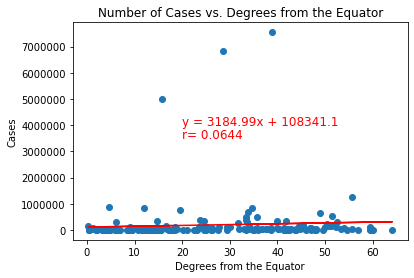

In [26]:
lat_abs = data_lat['Latitude'].apply(lambda x: float(x)).abs()
plt.scatter(lat_abs,data_lat['Cases'],marker="o")
plt.xlabel('Degrees from the Equator')
plt.ylabel('Cases')
plt.title('Number of Cases vs. Degrees from the Equator')
plt.ticklabel_format(style='plain')
slope6, intercept6, r6, p6, std_err6 = st.linregress(lat_abs,data_lat['Cases'])
fit6 = slope6 * lat_abs + intercept6
plt.plot(lat_abs,fit6,color='r')
line_eq6 = f"y = {round(slope6,2)}x + {round(intercept6,2)}"
plt.annotate(line_eq6,(20,4000000),fontsize=12,color="red")
plt.annotate(f"r= {round(r6,4)}",(20,3500000),fontsize=12,color="red")
plt.savefig("Resources/cases_vs_degrees.png")
plt.show()

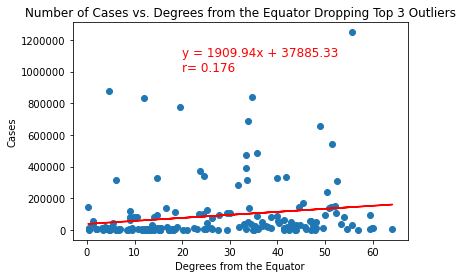

In [27]:
data_lat_cases = data_lat.sort_values('Cases',ascending=False)
data_lat_cases = data_lat_cases.iloc[3:]
lat_abs_cases = data_lat_cases['Latitude'].apply(lambda x: float(x)).abs()
plt.scatter(lat_abs_cases,data_lat_cases['Cases'],marker="o")
plt.xlabel('Degrees from the Equator')
plt.ylabel('Cases')
plt.title('Number of Cases vs. Degrees from the Equator Dropping Top 3 Outliers')
plt.ticklabel_format(style='plain')
slope4, intercept4, r4, p4, std_err4 = st.linregress(lat_abs_cases,data_lat_cases['Cases'])
fit4 = slope4 * lat_abs_cases + intercept4
plt.plot(lat_abs_cases,fit4,color='r')
line_eq4 = f"y = {round(slope4,2)}x + {round(intercept4,2)}"
plt.annotate(line_eq4,(20,1100000),fontsize=12,color="red")
plt.annotate(f"r= {round(r4,4)}",(20,1000000),fontsize=12,color="red")
plt.savefig("Resources/cases_vs_degrees_dropoutliers.png")
plt.show()

r=0.0593


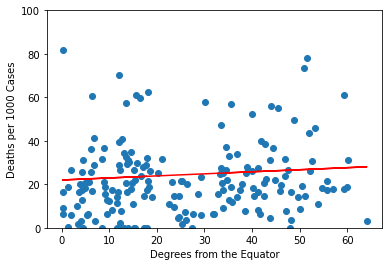

In [28]:
plt.scatter(lat_abs,data_lat['Deaths per 1000 Cases'],marker="o")
plt.xlabel('Degrees from the Equator')
plt.ylabel('Deaths per 1000 Cases')
plt.ylim(0,100)
slope, intercept, r, p, std_err = st.linregress(lat_abs, data_lat['Deaths per 1000 Cases'])
fit = slope * lat_abs + intercept
plt.plot(lat_abs,fit,color='r')
print(f"r={round(r,4)}")
plt.show()

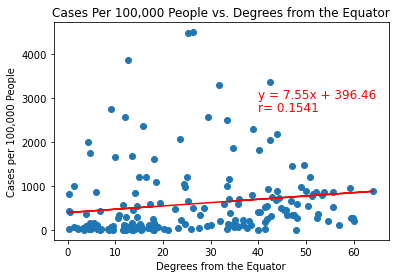

In [29]:
plt.scatter(lat_abs,data_lat['Cases per 100,000 People'],marker="o")
plt.xlabel('Degrees from the Equator')
plt.ylabel('Cases per 100,000 People')
plt.title('Cases Per 100,000 People vs. Degrees from the Equator')
slope2, intercept2, r2, p2, std_err2 = st.linregress(lat_abs, data_lat['Cases per 100,000 People'])
fit2 = slope2 * lat_abs + intercept2
plt.plot(lat_abs,fit2,color='r')
line_eq2 = f"y = {round(slope2,2)}x + {round(intercept2,2)}"
plt.annotate(line_eq2,(40,3000),fontsize=12,color="red")
plt.annotate(f"r= {round(r2,4)}",(40,2700),fontsize=12,color="red")
plt.savefig("Resources/casesper100k_vs_degrees.png")
plt.show()

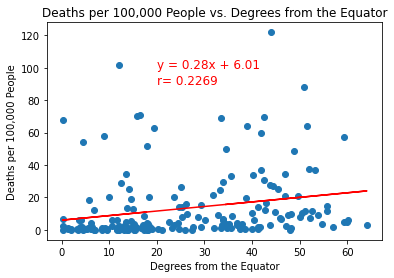

In [30]:
plt.scatter(lat_abs,data_lat['Deaths per 100,000 People'],marker="o")
plt.xlabel('Degrees from the Equator')
plt.ylabel('Deaths per 100,000 People')
plt.title('Deaths per 100,000 People vs. Degrees from the Equator')
slope3, intercept3, r3, p3, std_err3 = st.linregress(lat_abs, data_lat['Deaths per 100,000 People'])
fit3 = slope3 * lat_abs + intercept3
plt.plot(lat_abs,fit3,color='r')
line_eq3 = f"y = {round(slope3,2)}x + {round(intercept3,2)}"
plt.annotate(line_eq3,(20,100),fontsize=12,color="red")
plt.annotate(f"r= {round(r3,4)}",(20,90),fontsize=12,color="red")
plt.savefig("Resources/deathsper100k_vs_degrees.png")
plt.show()

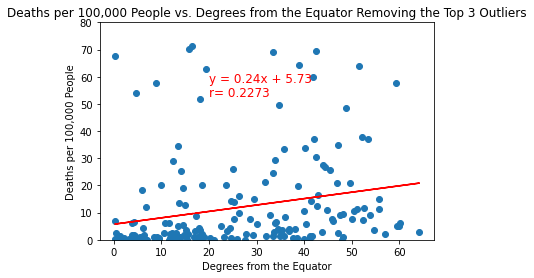

In [31]:
data_lat_deaths_per = data_lat.sort_values('Deaths per 100,000 People',ascending=False)
data_lat_deaths_per = data_lat_deaths_per.iloc[3:]
lat_abs_deaths_per = data_lat_deaths_per['Latitude'].apply(lambda x: float(x)).abs()
plt.scatter(lat_abs_deaths_per,data_lat_deaths_per['Deaths per 100,000 People'],marker="o")
plt.xlabel('Degrees from the Equator')
plt.ylabel('Deaths per 100,000 People')
plt.title('Deaths per 100,000 People vs. Degrees from the Equator Removing the Top 3 Outliers')
plt.ylim(0,80)
slope5, intercept5, r5, p5, std_err5 = st.linregress(lat_abs_deaths_per, data_lat_deaths_per['Deaths per 100,000 People'])
fit5 = slope5 * lat_abs_deaths_per + intercept5
plt.plot(lat_abs_deaths_per,fit5,color='r')
line_eq5 = f"y = {round(slope5,2)}x + {round(intercept5,2)}"
plt.annotate(line_eq5,(20,58),fontsize=12,color="red")
plt.annotate(f"r= {round(r5,4)}",(20,53),fontsize=12,color="red")
plt.show()

In [32]:
subset = data_lat[['Country', 'Cases', 'Deaths', 'Deaths per 1000 Cases', 'Population 2019', 'Latitude']]
subset.head()

,Country,Cases,Deaths,Deaths per 1000 Cases,Population 2019,Latitude
0,Afghanistan,39616,1470,37.11,38041757.0,34.5167
1,Albania,14730,407,27.63,2862427.0,41.3275
2,Algeria,52520,1779,33.87,43053054.0,36.7631
3,Andorra,2568,53,20.64,76177.0,42.5
4,Angola,5725,211,36.86,31825299.0,-8.8383


In [33]:
pbins = [0, 109999, 799999, 2399999, 4949999, 8499999, 11499999, 18999999, 34999999, 79999999, 1500000000]
pop_ranges = ['up to 110k', '110k-799k','800k-2.39m', '2.4m-4.94m', '4.95m-8.49m', '8.5m-11.49m', '11.5m-18.9m', '20m-34.9m', '35m-79.9m', '70m-1.5b']
subset['Population Range'] = pd.cut(subset['Population 2019'], pbins, labels=pop_ranges, include_lowest=True)
subset['Latitude'].astype(float)
subset.head()

<ipython-input-33-041ca4f4453d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Population Range'] = pd.cut(subset['Population 2019'], pbins, labels=pop_ranges, include_lowest=True)


,Country,Cases,Deaths,Deaths per 1000 Cases,Population 2019,Latitude,Population Range
0,Afghanistan,39616,1470,37.11,38041757.0,34.5167,35m-79.9m
1,Albania,14730,407,27.63,2862427.0,41.3275,2.4m-4.94m
2,Algeria,52520,1779,33.87,43053054.0,36.7631,35m-79.9m
3,Andorra,2568,53,20.64,76177.0,42.5,up to 110k
4,Angola,5725,211,36.86,31825299.0,-8.8383,20m-34.9m


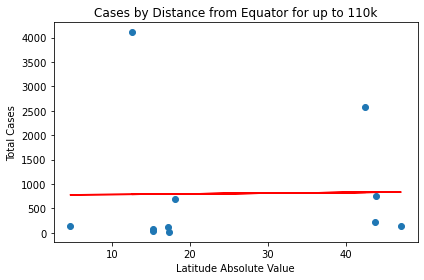

r-squared : 0.0
Correlation Coefficient : 0.02
-------------------------------------------------------


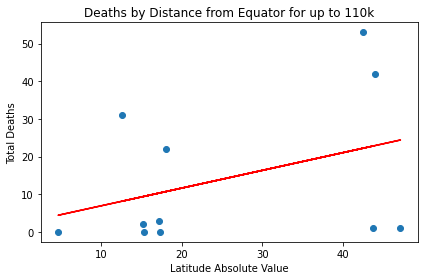

r-squared : 0.14
Correlation Coefficient : 0.37
-------------------------------------------------------


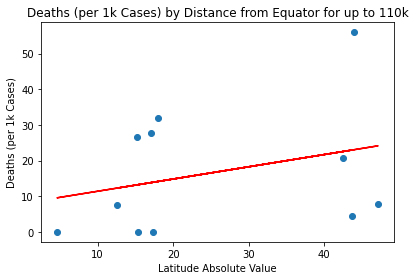

r-squared : 0.09
Correlation Coefficient : 0.3


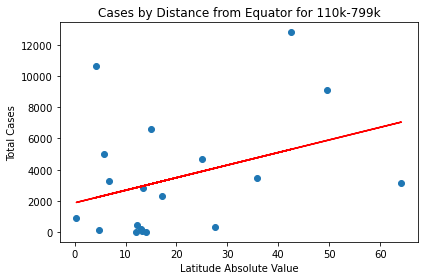

r-squared : 0.13
Correlation Coefficient : 0.36
-------------------------------------------------------


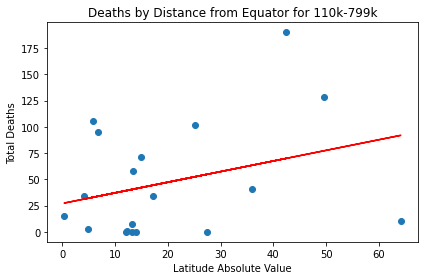

r-squared : 0.1
Correlation Coefficient : 0.32
-------------------------------------------------------


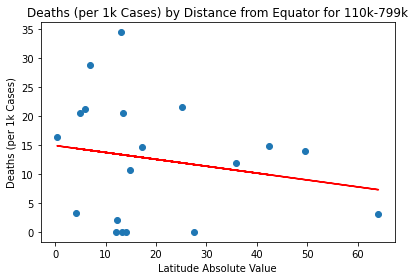

r-squared : 0.04
Correlation Coefficient : -0.19


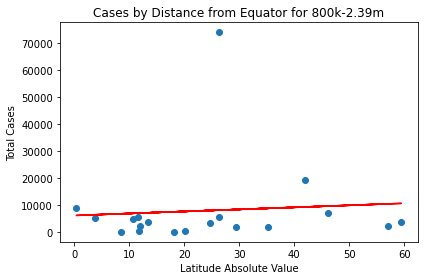

r-squared : 0.01
Correlation Coefficient : 0.08
-------------------------------------------------------


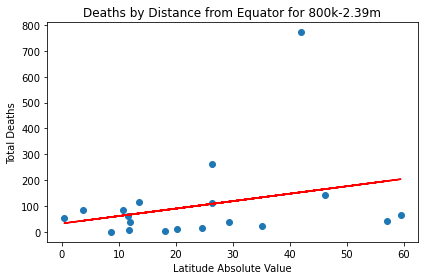

r-squared : 0.08
Correlation Coefficient : 0.28
-------------------------------------------------------


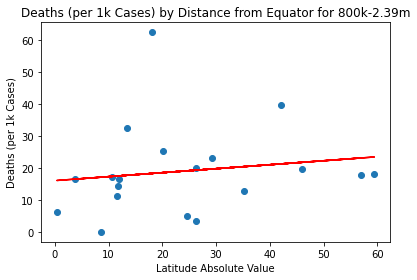

r-squared : 0.02
Correlation Coefficient : 0.15


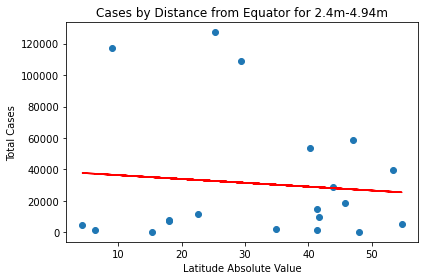

r-squared : 0.01
Correlation Coefficient : -0.1
-------------------------------------------------------


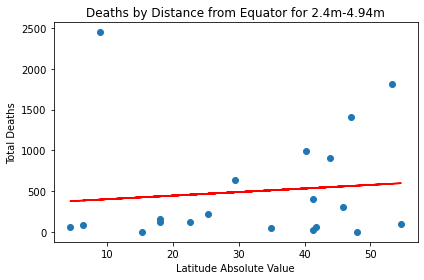

r-squared : 0.01
Correlation Coefficient : 0.1
-------------------------------------------------------


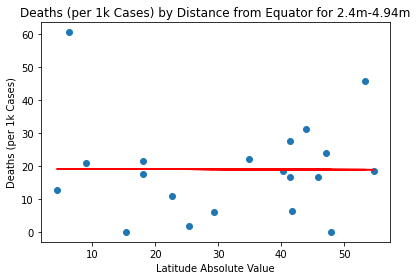

r-squared : 0.0
Correlation Coefficient : -0.0


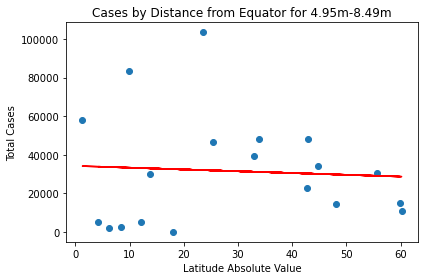

r-squared : 0.0
Correlation Coefficient : -0.06
-------------------------------------------------------


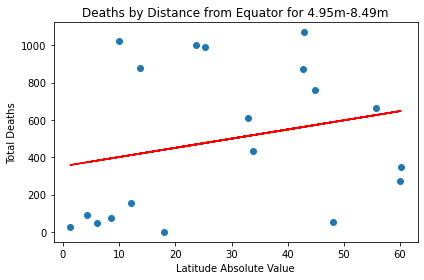

r-squared : 0.06
Correlation Coefficient : 0.24
-------------------------------------------------------


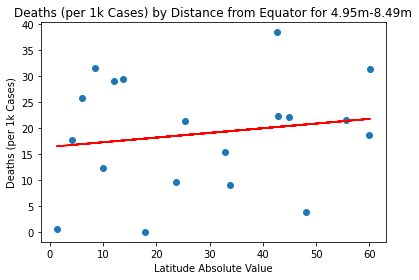

r-squared : 0.03
Correlation Coefficient : 0.16


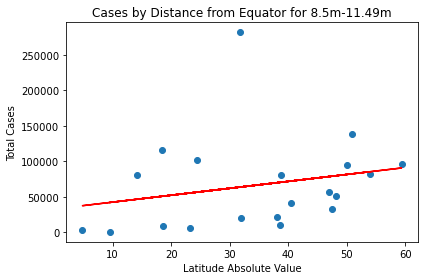

r-squared : 0.06
Correlation Coefficient : 0.23
-------------------------------------------------------


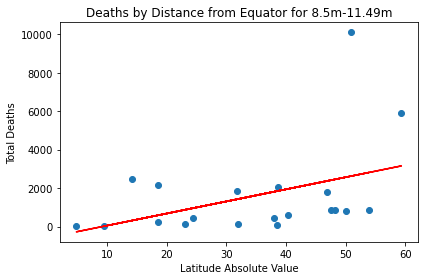

r-squared : 0.17
Correlation Coefficient : 0.41
-------------------------------------------------------


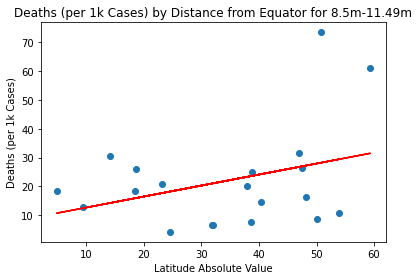

r-squared : 0.12
Correlation Coefficient : 0.34


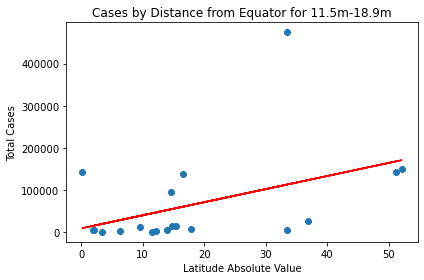

r-squared : 0.18
Correlation Coefficient : 0.43
-------------------------------------------------------


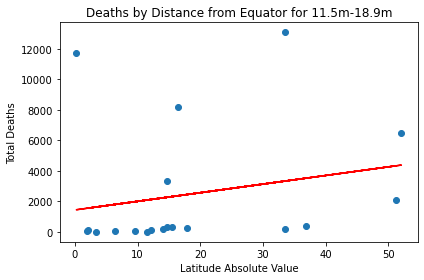

r-squared : 0.04
Correlation Coefficient : 0.21
-------------------------------------------------------


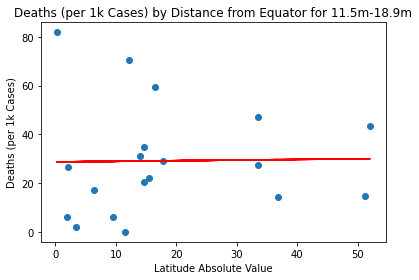

r-squared : 0.0
Correlation Coefficient : 0.02


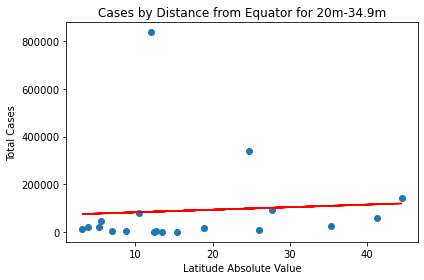

r-squared : 0.0
Correlation Coefficient : 0.07
-------------------------------------------------------


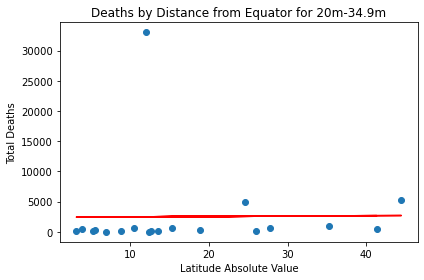

r-squared : 0.0
Correlation Coefficient : 0.01
-------------------------------------------------------


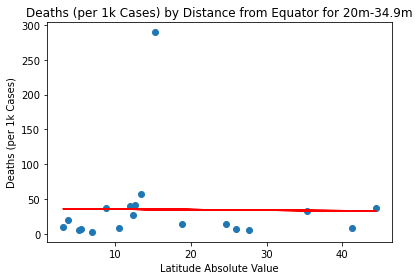

r-squared : 0.0
Correlation Coefficient : -0.02


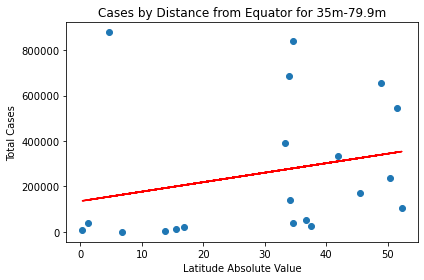

r-squared : 0.06
Correlation Coefficient : 0.24
-------------------------------------------------------


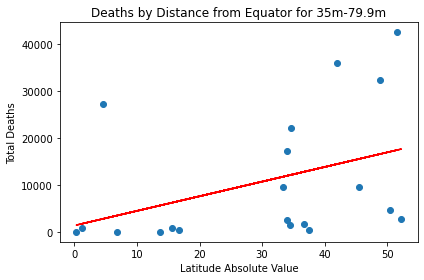

r-squared : 0.16
Correlation Coefficient : 0.39
-------------------------------------------------------


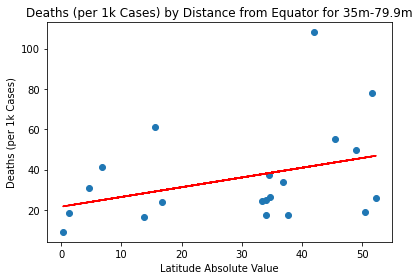

r-squared : 0.12
Correlation Coefficient : 0.35


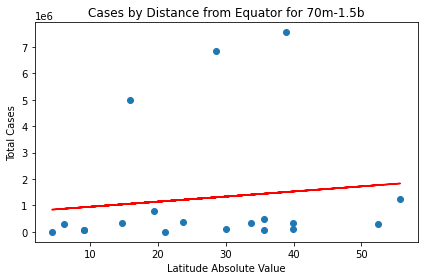

r-squared : 0.02
Correlation Coefficient : 0.12
-------------------------------------------------------


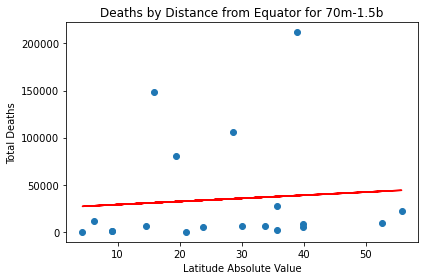

r-squared : 0.01
Correlation Coefficient : 0.08
-------------------------------------------------------


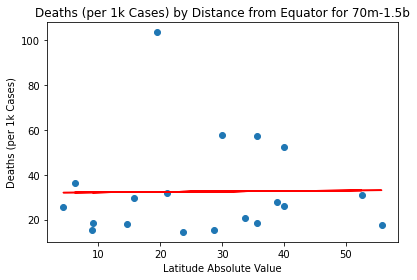

r-squared : 0.0
Correlation Coefficient : 0.01


In [34]:
case_cc_list = []
case_rs_list = []

deaths_cc_list = []
deaths_rs_list = []

mortality_cc_list = []
mortality_rs_list = []


for pop_range in pop_ranges:


    group = subset.loc[(subset['Population Range'] == f'{pop_range}')]
    group_lat = group['Latitude'].sort_values()
    group_lat_abs = group['Latitude'].apply(lambda x: float(x)).abs()

    group_cases = group['Cases']
    group_deaths = group['Deaths']
    group_dp1k = group['Deaths per 1000 Cases']


    plt.scatter(group_lat_abs, group_cases)
    plt.xlabel('Latitude Absolute Value')
    plt.ylabel('Total Cases')
    plt.title(f'Cases by Distance from Equator for {pop_range}')


    slope, intercept, r, p, std_err = st.linregress(group_lat_abs, group_cases)
    fit = slope * group_lat_abs + intercept
    plt.plot(group_lat_abs,fit,color='r')

    plt.tight_layout()
    plt.savefig(f'Images/Lat vs Cases for{pop_range}.png')
    plt.show()
    
    rs = round(r**2,2)
    cc = round(st.pearsonr(group_lat_abs,group_cases)[0],2)
    case_cc_list.append(cc)
    case_rs_list.append(rs)
    
    print(f"r-squared : {rs}")
    print(f"Correlation Coefficient : {cc}")
    print('-------------------------------------------------------')
    
    #-------------------------------------------------------------------------------------------------------------------------
  
    plt.scatter(group_lat_abs, group_deaths)
    plt.xlabel('Latitude Absolute Value')
    plt.ylabel('Total Deaths')
    plt.title(f'Deaths by Distance from Equator for {pop_range}')


    slope, intercept, r, p, std_err = st.linregress(group_lat_abs, group_deaths)
    fit = slope * group_lat_abs + intercept
    plt.plot(group_lat_abs,fit,color='r')


    plt.tight_layout()
    plt.savefig(f'Images/Lat vs Deaths for{pop_range}.png')
    plt.show()

    rs = round(r**2,2)
    cc = round(st.pearsonr(group_lat_abs,group_deaths)[0],2)
    deaths_cc_list.append(cc)
    deaths_rs_list.append(rs)
    
    print(f"r-squared : {rs}")
    print(f"Correlation Coefficient : {cc}")
    print('-------------------------------------------------------')
    #-------------------------------------------------------------------------------------------------------------------------
    plt.subplots()
    plt.scatter(group_lat_abs, group_dp1k)
    plt.xlabel('Latitude Absolute Value')
    plt.ylabel('Deaths (per 1k Cases)')
    plt.title(f'Deaths (per 1k Cases) by Distance from Equator for {pop_range}')


    slope, intercept, r, p, std_err = st.linregress(group_lat_abs, group_dp1k)
    fit = slope * group_lat_abs + intercept
    plt.plot(group_lat_abs,fit,color='r')


    plt.tight_layout()
    plt.savefig(f'Images/Lat vs Mortality for{pop_range}.png')
    plt.show()

    rs = round(r**2,2)
    cc = round(st.pearsonr(group_lat_abs,group_dp1k)[0],2)
    mortality_cc_list.append(cc)
    mortality_rs_list.append(rs)
    
    print(f"r-squared : {rs}")
    print(f"Correlation Coefficient : {cc}")



In [35]:
cc_df = pd.DataFrame(list(zip(pop_ranges, case_cc_list, deaths_cc_list, mortality_cc_list)),
                       columns = ['Population', 'Cases', 'Deaths','Mortality'])
cc_df.set_index('Population')

,Cases,Deaths,Mortality
Population,,,
up to 110k,0.02,0.37,0.30
110k-799k,0.36,0.32,-0.19
800k-2.39m,0.08,0.28,0.15
2.4m-4.94m,-0.10,0.10,-0.00
4.95m-8.49m,-0.06,0.24,0.16
8.5m-11.49m,0.23,0.41,0.34
11.5m-18.9m,0.43,0.21,0.02
20m-34.9m,0.07,0.01,-0.02
35m-79.9m,0.24,0.39,0.35


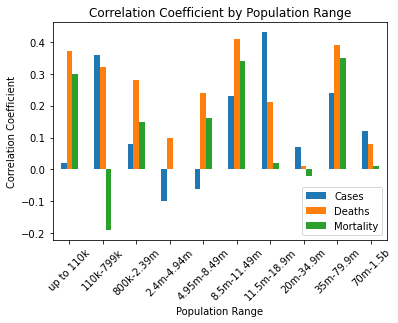

In [36]:
cc_df.plot(kind='bar')
plt.xlabel('Population Range')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient by Population Range')
ticks = range(0, 10)
plt.xticks(ticks, labels=pop_ranges, rotation=45)

plt.savefig('Images/correlation coefficient by pop.png')
plt.show()

In [37]:
rs_df = pd.DataFrame(list(zip(pop_ranges, case_rs_list, deaths_rs_list, mortality_rs_list)),
                       columns = ['Population', 'Cases', 'Deaths','Mortality'])
rs_df.set_index('Population')

,Cases,Deaths,Mortality
Population,,,
up to 110k,0.00,0.14,0.09
110k-799k,0.13,0.10,0.04
800k-2.39m,0.01,0.08,0.02
2.4m-4.94m,0.01,0.01,0.00
4.95m-8.49m,0.00,0.06,0.03
8.5m-11.49m,0.06,0.17,0.12
11.5m-18.9m,0.18,0.04,0.00
20m-34.9m,0.00,0.00,0.00
35m-79.9m,0.06,0.16,0.12


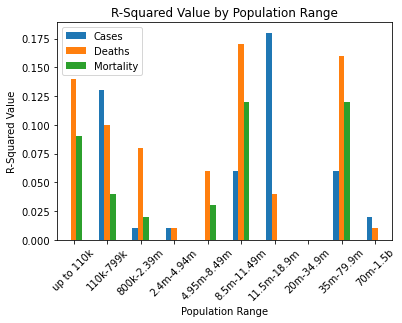

In [38]:
rs_df.plot(kind='bar')
plt.xlabel('Population Range')
plt.ylabel('R-Squared Value')
plt.title('R-Squared Value by Population Range')
ticks = range(0, 10)
plt.xticks(ticks, labels=pop_ranges, rotation=45)

plt.savefig('Images/rs value by pop.png')
plt.show()

In [39]:
pop_group = subset.groupby('Population Range')
avg_deaths = pop_group['Deaths per 1000 Cases'].mean()

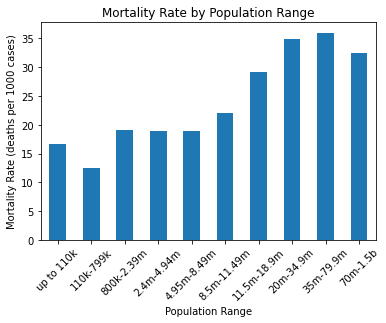

In [40]:
avg_deaths.plot(kind='bar')
plt.xlabel('Population Range')
plt.ylabel('Mortality Rate (deaths per 1000 cases)')
plt.title('Mortality Rate by Population Range')
plt.xticks(rotation=45)
plt.savefig('Images/mortality by pop.png')
plt.show()